<a href="https://colab.research.google.com/github/jysonganan/methylDeConv/blob/master/Tutorial_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Example of deconvolution with R package methylDeconv**

# (1) Install R package **methylDeConv**

In [1]:
devtools::install_github("jysonganan/methylDeConv")


✔  checking for file ‘/tmp/RtmpxRWezO/remotesd21068b392f9/jysonganan-methylDeConv-8c81b1e/DESCRIPTION’
─  preparing ‘methylDeConv’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
   Omitted ‘LazyData’ from DESCRIPTION
─  building ‘methylDeConv_0.1.1.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(methylDeConv)

# (2) Benchmark dataset 1

(if IlluminaHumanMethylationEPICmanifest not installed, install it first to load the Benchmark dataset 1)

In [3]:
if (!requireNamespace("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("IlluminaHumanMethylationEPICmanifest")

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.13 (BiocManager 1.30.16), R 4.1.0 (2021-05-18)

Warning message:
“package(s) not installed when version(s) same as current; use `force = TRUE` to
  re-install: 'IlluminaHumanMethylationEPICmanifest'”
Old packages: 'broom', 'dplyr', 'ggplot2', 'openssl', 'rmarkdown', 'testthat',
  'xfun'



In [4]:
library(ExperimentHub)
hub <- ExperimentHub()
query(hub, "FlowSorted.Blood.EPIC")
FlowSorted.Blood.EPIC <- hub[["EH1136"]]
annot <- as.data.frame(colData(FlowSorted.Blood.EPIC))
benchmark <- which(annot$CellType == "MIX")
tmp <- getBeta(preprocessNoob(FlowSorted.Blood.EPIC, dyeMethod = "single"))
benchmark_betamatrix <- tmp[,rownames(annot)[benchmark]]
benchmark_trueprop <- annot[benchmark, c("Bcell", "CD4T", "CD8T", "Mono", "Neu", "NK")]

Loading required package: BiocGenerics

Loading required package: parallel


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:parallel’:

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, append, as.data.frame, basename, cbind, colnames,
    dirname, do.call, duplicated, eval, evalq, Filter, Find, get, grep,
    grepl, intersect, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, setdiff, sort, table, tapply,
    union, unique, unsplit, which.max, which.min


Loading required package: AnnotationHub

Loading required package: BiocFileCache

Loading required package: dbplyr


ExperimentHub with 1 record
# snapshotDate(): 2021-05-18
# names(): EH1136
# package(): FlowSorted.Blood.EPIC
# $dataprovider: GEO
# $species: Homo sapiens
# $rdataclass: RGChannelSet
# $rdatadateadded: 2018-04-20
# $title: FlowSorted.Blood.EPIC: Illumina Human Methylation data from EPIC o...
# $description: The FlowSorted.Blood.EPIC package contains Illumina HumanMet...
# $taxonomyid: 9606
# $genome: hg19
# $sourcetype: tar.gz
# $sourceurl: https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi?acc=GSE110554
# $sourcesize: NA
# $tags: c("ExperimentData", "Homo_sapiens_Data", "Tissue",
#   "MicroarrayData", "Genome", "TissueMicroarrayData",
#   "MethylationArrayData") 
# retrieve record with 'object[["EH1136"]]' 

see ?FlowSorted.Blood.EPIC and browseVignettes('FlowSorted.Blood.EPIC') for documentation

loading from cache

Loading required package: IlluminaHumanMethylationEPICmanifest



In [5]:
dim(benchmark_betamatrix)

[1] 866091     12

In [6]:
head(benchmark_betamatrix)

,201868590193_R01C01,201868590243_R02C01,201868590267_R01C01,201868590267_R05C01,201869680008_R01C01,201869680008_R03C01,201869680008_R06C01,201869680030_R03C01,201869680030_R07C01,201870610056_R01C01,201870610056_R03C01,201870610111_R03C01
cg18478105,0.01702453,0.01574861,0.01423329,0.01388660,0.01650928,0.01472219,0.01314978,0.01461698,0.01427312,0.01453124,0.01305018,0.01303359
cg09835024,0.02604445,0.02970111,0.02595605,0.02511782,0.02702993,0.02604845,0.02902573,0.03026829,0.02914651,0.02681398,0.02371103,0.02822073
cg14361672,0.87310430,0.87221265,0.83411392,0.89547765,0.93390651,0.87356041,0.91061750,0.87034965,0.88786205,0.91925110,0.94087679,0.92954141
cg01763666,0.79525434,0.84353888,0.83622186,0.83862474,0.70936470,0.85425543,0.79649352,0.83779752,0.86279212,0.76256293,0.79781115,0.88292990
cg12950382,0.91484448,0.93449426,0.92180859,0.94433269,0.92341113,0.95121491,0.93244840,0.93499774,0.94431952,0.92468989,0.93745606,0.93050688
cg02115394,0.05452384,0.05352603,0.05283190,0.05644999,0.05784972,0.06438007,0.04819230,0.05439797,0.04933913,0.05658344,0.06316266,0.05064063


# (3) build reference library/matrix 
The reference matrix only contain 6 immune cell types; 

The reference matrix is for methylation EPIC arrays.

In [7]:
reference_EPIC <- build_reference_EPIC(extend = FALSE)
compTable_EPIC <- ref_compTable(reference_EPIC$ref_betamatrix, reference_EPIC$ref_phenotype)
compTable_EPIC <- compTable_EPIC[,3:8]

snapshotDate(): 2021-05-18

see ?FlowSorted.Blood.EPIC and browseVignettes('FlowSorted.Blood.EPIC') for documentation

loading from cache



The average reference profiles for each cell type.

In [8]:
head(compTable_EPIC)

,Bcell,CD4T,CD8T,Mono,Neu,NK
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
cg18478105,0.01441151,0.01554746,0.01462471,0.01373098,0.01442258,0.01433282
cg09835024,0.03098349,0.03214936,0.03153552,0.03361905,0.03322739,0.02888023
cg14361672,0.95039413,0.92761772,0.95167270,0.94084677,0.83567751,0.94732244
cg01763666,0.93013417,0.62732184,0.62612835,0.94635067,0.92667248,0.68928340
cg12950382,0.92683978,0.93809369,0.93350899,0.93977310,0.92799543,0.92948944
cg02115394,0.06786865,0.07638789,0.06621879,0.06846221,0.04847582,0.05070331


# (4) cell-type specific feature selection






*   **OneVsAllttest** 
    
    One-vs-All t test feature selection




In [9]:
set.seed(2)
probe_1 <- ref_probe_selection_oneVsAllttest(reference_EPIC$ref_betamatrix, reference_EPIC$ref_phenotype)



*   **glmnetpreselect** 
    
    Two stages selection: 1. select top features from one-vs-all t test; 2. select the non-zero features with multi-class elastic-net modeling




In [10]:
set.seed(2)
probe_6 <- ref_probe_selection_twoStage(reference_EPIC$ref_betamatrix, reference_EPIC$ref_phenotype,
                                        preselect = 300, ml_model = "elastic net")

Loading required package: dplyr


Attaching package: ‘dplyr’


The following object is masked from ‘package:nlme’:

    collapse


The following object is masked from ‘package:minfi’:

    combine


The following objects are masked from ‘package:Biostrings’:

    collapse, intersect, setdiff, setequal, union


The following object is masked from ‘package:XVector’:

    slice


The following object is masked from ‘package:Biobase’:

    combine


The following object is masked from ‘package:matrixStats’:

    count


The following objects are masked from ‘package:GenomicRanges’:

    intersect, setdiff, union


The following object is masked from ‘package:GenomeInfoDb’:

    intersect


The following objects are masked from ‘package:IRanges’:

    collapse, desc, intersect, setdiff, slice, union


The following objects are masked from ‘package:S4Vectors’:

    first, intersect, rename, setdiff, setequal, union


The following objects are masked from ‘package:dbplyr’:

    ident, sql


T

Aggregating results
Selecting tuning parameters
Fitting alpha = 0.1, lambda = 1 on full training set


Warning message in lognet(xd, is.sparse, ix, jx, y, weights, offset, alpha, nobs, :
“one multinomial or binomial class has fewer than 8  observations; dangerous ground”
Retrieving Nonzero Coefficients



# (5) deconvolution

Perform deconvolutions of Houseman, RPC, CBS and MethylResolver methods, with different feature selection.

In [11]:

Houseman_res_1 <- Houseman_project(benchmark_betamatrix, compTable_EPIC, probe_1)
RPC_res_1 <- RPC(benchmark_betamatrix, compTable_EPIC, probe_1)
CBS_res_1 <- CBS(benchmark_betamatrix, compTable_EPIC, probe_1)
MethylResolver_res_1 <- MethylResolver(benchmark_betamatrix, compTable_EPIC, probe_1)


1

2

3


Attaching package: ‘robustbase’


The following object is masked from ‘package:Biobase’:

    rowMedians


The following objects are masked from ‘package:MatrixGenerics’:

    colMedians, rowMedians


The following objects are masked from ‘package:matrixStats’:

    colMedians, rowMedians



Attaching package: ‘Metrics’


The following objects are masked from ‘package:caret’:

    precision, recall




[1] 1
[1] "alphaBest selected"
[1] 0.05508248 0.05507204 0.05507570 0.05509487 0.05509026 0.05509137 0.05509410
[8] 0.05508584 0.05508970
[1] 0.55
[1] 2
[1] "alphaBest selected"
[1] 0.04192513 0.04349469 0.04451167 0.04439322 0.04400922 0.04436661 0.04374036
[8] 0.04345981 0.04333573
[1] 0.5
[1] 3
[1] "alphaBest selected"
[1] 0.03802537 0.03906080 0.03912781 0.03934741 0.03903051 0.03886428 0.03933093
[8] 0.03943758 0.03887711
[1] 0.5
[1] 4
[1] "alphaBest selected"
[1] 0.04564621 0.04530686 0.04615942 0.04559055 0.04553041 0.04638578 0.04597238
[8] 0.04551796 0.04558771
[1] 0.55
[1] 5
[1] "alphaBest selected"
[1] 0.05445251 0.05444441 0.05442431 0.05442021 0.05441806 0.05442301 0.05442883
[8] 0.05441287 0.05442818
[1] 0.85
[1] 6
[1] "alphaBest selected"
[1] 0.04200051 0.04198602 0.04197642 0.04201072 0.04210090 0.04194711 0.04192362
[8] 0.04198411 0.04209428
[1] 0.8
[1] 7
[1] "alphaBest selected"
[1] 0.05394742 0.05398797 0.05404953 0.05402818 0.05395622 0.05392521 0.05397197
[8] 0.053

In [12]:
Houseman_res_6 <- Houseman_project(benchmark_betamatrix, compTable_EPIC, probe_6)
RPC_res_6 <- RPC(benchmark_betamatrix, compTable_EPIC, probe_6)
CBS_res_6 <- CBS(benchmark_betamatrix, compTable_EPIC, probe_6)
MethylResolver_res_6 <- MethylResolver(benchmark_betamatrix, compTable_EPIC, probe_6)

1

2

3



[1] 1
[1] "alphaBest selected"
[1] 0.05376215 0.05395806 0.05398763 0.05387069 0.05389611 0.05389864 0.05388578
[8] 0.05393802 0.05390048
[1] 0.5
[1] 2
[1] "alphaBest selected"
[1] 0.03794143 0.03827959 0.03815682 0.03812449 0.03807150 0.03810474 0.03840652
[8] 0.03848158 0.03848187
[1] 0.5
[1] 3
[1] "alphaBest selected"
[1] 0.03618698 0.03599202 0.03618319 0.03593550 0.03591050 0.03593716 0.03586611
[8] 0.03583529 0.03595703
[1] 0.85
[1] 4
[1] "alphaBest selected"
[1] 0.04117733 0.04133548 0.04122502 0.04121989 0.04083198 0.04082063 0.04080749
[8] 0.04080553 0.04127248
[1] 0.85
[1] 5
[1] "alphaBest selected"
[1] 0.04880960 0.04918045 0.04915029 0.04909716 0.04916232 0.04905097 0.04909943
[8] 0.04916152 0.04919327
[1] 0.5
[1] 6
[1] "alphaBest selected"
[1] 0.03902027 0.03926992 0.03927227 0.03920879 0.03919298 0.03886752 0.03963868
[8] 0.03933480 0.03930733
[1] 0.75
[1] 7
[1] "alphaBest selected"
[1] 0.04893634 0.04901867 0.04947321 0.04923036 0.04910791 0.04853142 0.04863115
[8] 0.048

In [13]:
MethylResolver_res_1

,Bcell,CD4T,CD8T,Mono,Neu,NK
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
201868590193_R01C01,0.190842308,0.05551549,0.18263370,0.20006402,0.2138831,0.1570613485
201868590243_R02C01,0.043587326,0.15890090,0.03958028,0.05702447,0.6713782,0.0295288610
201868590267_R01C01,0.008729307,0.06158033,0.04226674,0.09108054,0.7959607,0.0003823633
201868590267_R05C01,0.022520078,0.16917504,0.11422095,0.08929023,0.5755962,0.0291975150
201869680008_R01C01,0.075234720,0.14373368,0.27221714,0.22218392,0.1199393,0.1666912587
201869680008_R03C01,0.021706454,0.14580273,0.08441520,0.07361580,0.6406307,0.0338291280
201869680008_R06C01,0.077531393,0.03395583,0.31517411,0.19514844,0.2425810,0.1356092677
201869680030_R03C01,0.063403993,0.12217746,0.05719451,0.05486810,0.6234078,0.0789481146
201869680030_R07C01,0.022359557,0.13416360,0.03029480,0.06393425,0.7027425,0.0465052786


# Performance evaluation

Compute the within sample correalations with true proportions; average over samples.

In [14]:
within_sample_corr <- function(true_proportions, deconv_res){
  corr <- rep(NA, 12)
  for (i in 1:12){
    corr[i] <- cor(as.numeric(true_proportions[i,c("Bcell", "CD4T","CD8T","Mono","Neu","NK")]),
                   as.numeric(deconv_res[i,c("Bcell", "CD4T","CD8T","Mono","Neu","NK")]), method = "spearman")
  }
  print(mean(corr))
  return(mean(corr))
}


In [15]:
cor_Houseman_1 <- within_sample_corr(benchmark_trueprop, Houseman_res_1)
cor_RPC_1 <-within_sample_corr(benchmark_trueprop, RPC_res_1)
cor_CBS_1 <- within_sample_corr(benchmark_trueprop, CBS_res_1)
cor_MethylResolver_1 <- within_sample_corr(benchmark_trueprop, MethylResolver_res_1)

[1] 0.9783402
[1] 0.9783402
[1] 0.9562116
[1] 0.9783402


In [16]:
cor_Houseman_6 <- within_sample_corr(benchmark_trueprop, Houseman_res_6)
cor_RPC_6 <- within_sample_corr(benchmark_trueprop, RPC_res_6)
cor_CBS_6 <- within_sample_corr(benchmark_trueprop, CBS_res_6)
cor_MethylResolver_6 <- within_sample_corr(benchmark_trueprop, MethylResolver_res_6)

[1] 0.9472836
[1] 0.9377597
[1] 0.9497688
[1] 0.9200058


### barplots


Attaching package: ‘tidyr’


The following objects are masked from ‘package:Matrix’:

    expand, pack, unpack


The following object is masked from ‘package:S4Vectors’:

    expand




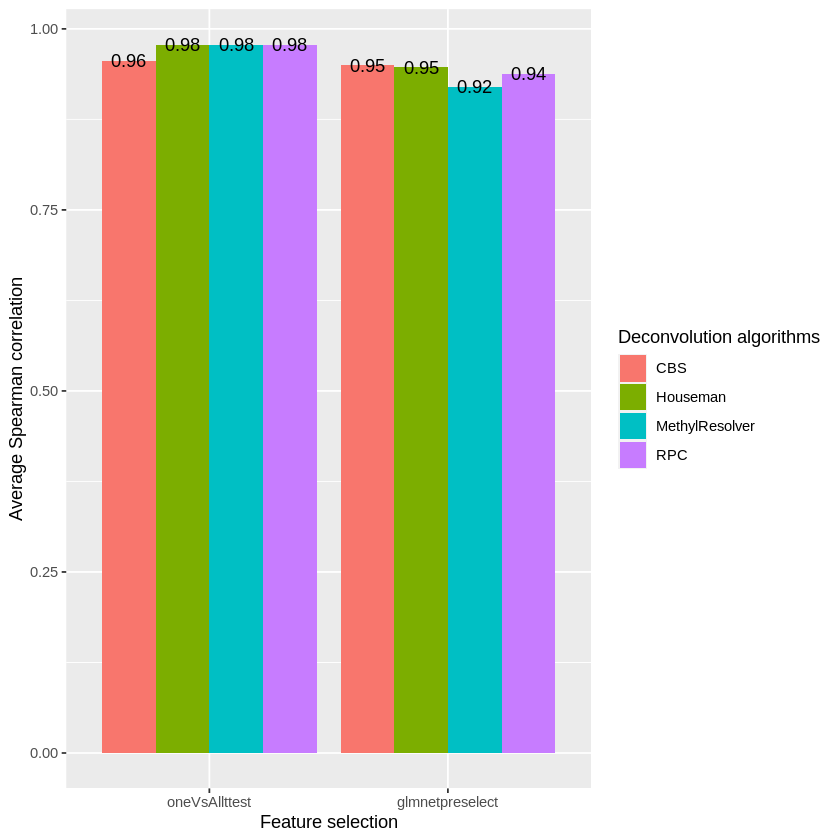

In [17]:
library(tidyr)
library(ggplot2)

cor_Houseman <- c(cor_Houseman_1, cor_Houseman_6)
cor_RPC <- c(cor_RPC_1, cor_RPC_6)
cor_CBS <- c(cor_CBS_1, cor_CBS_6)
cor_MethylResolver <- c(cor_MethylResolver_1, cor_MethylResolver_6)


df1 <- data.frame(FeatureSelection = c("oneVsAllttest","glmnetpreselect"),
                  Houseman = cor_Houseman, RPC = cor_RPC, CBS = cor_CBS, MethylResolver = cor_MethylResolver)

print(ggplot(data = df1 %>% gather(Deconvolution, Spearman_Correlation, -FeatureSelection),
       aes(x = factor(FeatureSelection, level = c("oneVsAllttest", "glmnetpreselect")), y = Spearman_Correlation, fill = Deconvolution)) +
  geom_bar(stat = 'identity', position = 'dodge')+
  geom_text(aes(label= round(Spearman_Correlation,2)), position = position_dodge(0.9))+
  labs(x = "Feature selection")+
  labs(y = "Average Spearman correlation")+
  labs(fill = "Deconvolution algorithms"))